In [78]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2020-02-02 06:30:00--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.203.128, 2607:f8b0:400c:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.02s   

2020-02-02 06:30:00 (207 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [0]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [80]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))


153


In [81]:
with open("/tmp/bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile,delimiter=',')
    next(reader)

    for row in reader:
      labels.append(row[0])
      sentence=row[1]
      for word in stopwords:
        token=''+word+''
        sentence=sentence.replace(token,'')
        sentence=sentence.replace(' ', ' ')
      sentences.append(sentence)

    
print(len(labels))
print(len(sentences))
print(sentences[0])


2225
2225
tv future n t hnds  vers wth ho ttre systems  plsm hgh-defnt tvs  nd dgtl vdeo recders movng n t lvng room  t wy people wtch tv wll  rdclly dfferent n fve yers  t.  tht s ccdng  n expert pnel whch gtred t t nnul csur electrcs s n ls vegs  dscuss  tse new technologes wll mpct e   fvte psts. wth t us ledng t trend  progrms nd otr ctent wll  delvered  vers v ho netwks   cble  stellte  telecoms compnes  nd brodbnd servce provders  frt rooms nd ptble devces.  e  t  tlked-b technologes  ces hs en dgtl nd persl vdeo recders (dvr nd pvr). tse set-p boxes  lke t us s tvo nd t uk s sky+ system  llow people  recd  ste  ply  puse nd wrd wnd tv progrms wn ty wnt.  essentlly  t technology llows  much  perslsed tv. ty re l ng bult-n  hgh-defnt tv sets  whch re bg busness n jpn nd t us   slor  tke f n europe cuse  t lck  hgh-defnt progrmmng. not ly cn people wrd wnd  dverts  ty cn l get b bdng  netwk nd chnnel scdules  puttng getr tr  -l-crte entertnnt.   us netwks nd cble nd stellte compnes

In [82]:
train_size = 1780

train_sentences = sentences[0:train_size]
train_labels =labels[0:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))


1780
1780
1780
445
445


In [83]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)


print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))



647
120
257
120
268
120


In [84]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded =pad_sequences(validation_sequences,maxlen=max_length)

print(len(validation_sequences))
print(validation_padded.shape)



445
(445, 120)


In [85]:
import numpy as np

label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(np.shape(training_label_seq))

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(np.shape(validation_label_seq))



[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [86]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(24,activation='relu'),
  tf.keras.layers.Dense(6,activation='sigmoid')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d_6 ( (None, 16)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 24)                408       
_________________________________________________________________
dense_13 (Dense)             (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [88]:
num_epochs = 30
history = model.fit(train_padded,training_label_seq,epochs=num_epochs,validation_data=(validation_padded,validation_label_seq),verbose=2,)

Train on 1780 samples, validate on 445 samples
Epoch 1/30
1780/1780 - 2s - loss: 1.7662 - acc: 0.2197 - val_loss: 1.7332 - val_acc: 0.2382
Epoch 2/30
1780/1780 - 0s - loss: 1.6905 - acc: 0.2270 - val_loss: 1.6474 - val_acc: 0.2382
Epoch 3/30
1780/1780 - 0s - loss: 1.6169 - acc: 0.2270 - val_loss: 1.5973 - val_acc: 0.2382
Epoch 4/30
1780/1780 - 0s - loss: 1.5771 - acc: 0.2270 - val_loss: 1.5673 - val_acc: 0.2382
Epoch 5/30
1780/1780 - 0s - loss: 1.5372 - acc: 0.2292 - val_loss: 1.5271 - val_acc: 0.2427
Epoch 6/30
1780/1780 - 0s - loss: 1.4716 - acc: 0.2854 - val_loss: 1.4554 - val_acc: 0.2989
Epoch 7/30
1780/1780 - 0s - loss: 1.3601 - acc: 0.4809 - val_loss: 1.3425 - val_acc: 0.5663
Epoch 8/30
1780/1780 - 0s - loss: 1.1982 - acc: 0.7742 - val_loss: 1.1901 - val_acc: 0.7236
Epoch 9/30
1780/1780 - 0s - loss: 1.0044 - acc: 0.8472 - val_loss: 1.0290 - val_acc: 0.7416
Epoch 10/30
1780/1780 - 0s - loss: 0.8162 - acc: 0.8725 - val_loss: 0.9061 - val_acc: 0.7640
Epoch 11/30
1780/1780 - 0s - los

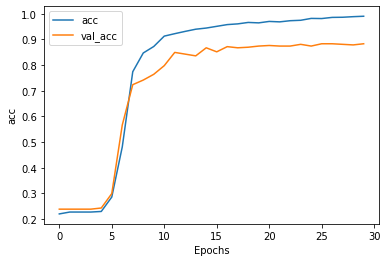

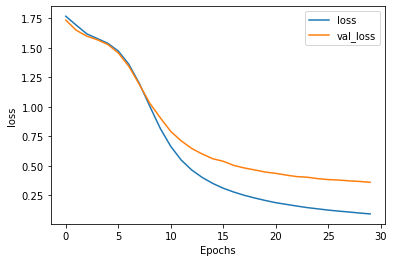

In [89]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


In [91]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)



(1000, 16)


In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')